In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import norm

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# compare S&P 500 statistics and VNIndex
SP500 = pd.read_csv('C:/Anaconda3/QF/blog/SP500.csv', parse_dates=['Date'], index_col=['Date'])
VNIndex = pd.read_csv('C:/Anaconda3/QF/blog/VNIndex.csv', parse_dates=['DATE'], index_col=['DATE'])

In [3]:
# format data format to match
VNIndex = VNIndex.reindex(index=VNIndex.index[::-1])

VNIndex = VNIndex.loc['2008-05-17':'2018-05-16']
SP500 = SP500.loc['2008-05-17':'2018-05-16']

# S&P 500

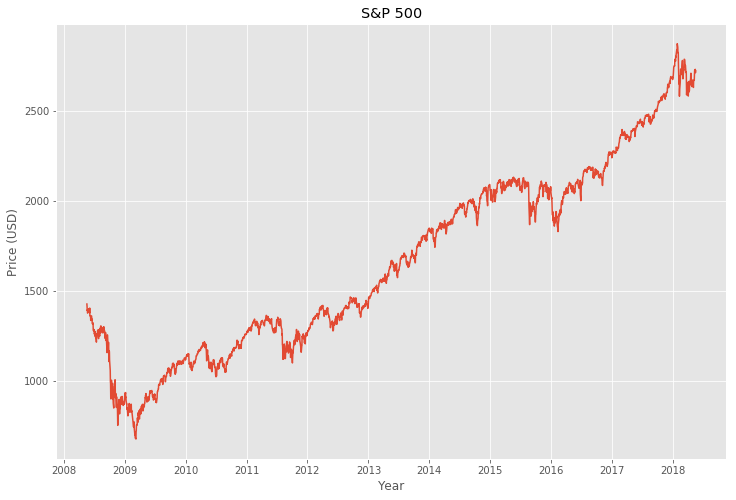

In [4]:
# plot line graph of S&P 500 close
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax1.plot(SP500['Close'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Price (USD)')
ax1.set_title('S&P 500')
plt.show()

# VN Index

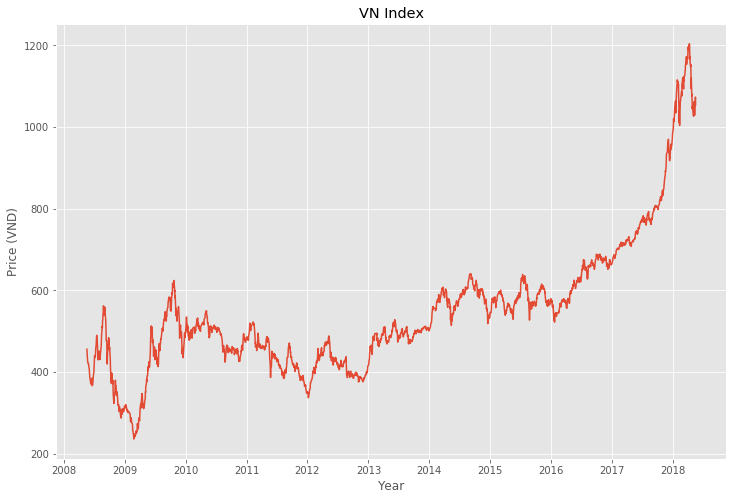

In [5]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax2.plot(VNIndex['CLOSE'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Price (VND)')
ax2.set_title('VN Index')
plt.show()

# Percentage Returns Over Time

In [6]:
# find dates for 10-year low
print(SP500.loc[SP500['Close'].idxmin()])
print('')
print(VNIndex.loc[VNIndex['CLOSE'].idxmin()])

Open         6.807600e+02
High         6.952700e+02
Low          6.728800e+02
Close        6.765300e+02
Adj Close    6.765300e+02
Volume       7.277320e+09
Name: 2009-03-09 00:00:00, dtype: float64

CLOSE        235.5
TICKER     VNIndex
OPEN        236.57
HIGH         236.7
LOW         234.66
VOLUME    11310260
Name: 2009-02-24 00:00:00, dtype: object


In [7]:
# percent return from 10-year low
S_pctR = ((SP500['Close'].iloc[-1]/min(SP500['Close'])) - 1) * 100
S_pctR = str("%.4f" % S_pctR)
print("S&P 500 return: " + S_pctR + " %")

V_pctR = ((VNIndex['CLOSE'].iloc[-1])/min(VNIndex['CLOSE']) - 1) * 100
V_pctR = str("%.4f" % V_pctR)
print("VN Index return: " + V_pctR + " %")

S&P 500 return: 302.4152 %
VN Index return: 347.8217 %


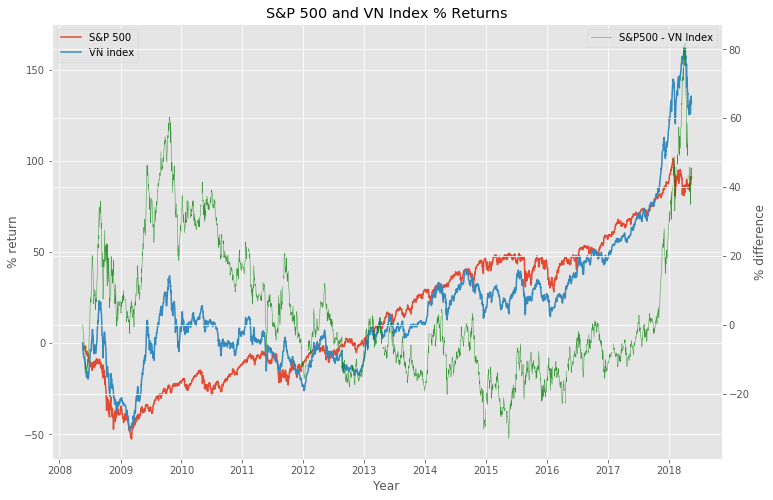

In [8]:
# plot percentage return and difference
SP500['pct return'] = (SP500['Close']/SP500['Close'].iloc[0] - 1) * 100
VNIndex['pct return'] = (VNIndex['CLOSE']/VNIndex['CLOSE'].iloc[0] - 1) * 100
SP500['pct_diff'] = VNIndex['pct return'] - SP500['pct return']

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax1.plot(SP500['pct return'], label='S&P 500')
ax1.plot(VNIndex['pct return'], label='VN Index')
ax1.set_xlabel('Year')
ax1.set_ylabel('% return')
ax1.set_title('S&P 500 and VN Index % Returns')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(SP500['pct_diff'], color='g', linewidth=.5, alpha=0.75, label='S&P500 - VN Index')
ax2.set_ylabel('% difference')
ax2.legend(loc='upper right')

plt.show()

# Daily Returns and Volatility

In [9]:
# check daily % changes
SP500['log_diff'] = SP500['Close'].apply(lambda x: np.log(x)).diff()
VNIndex['log_diff'] = VNIndex['CLOSE'].apply(lambda x: np.log(x)).diff()

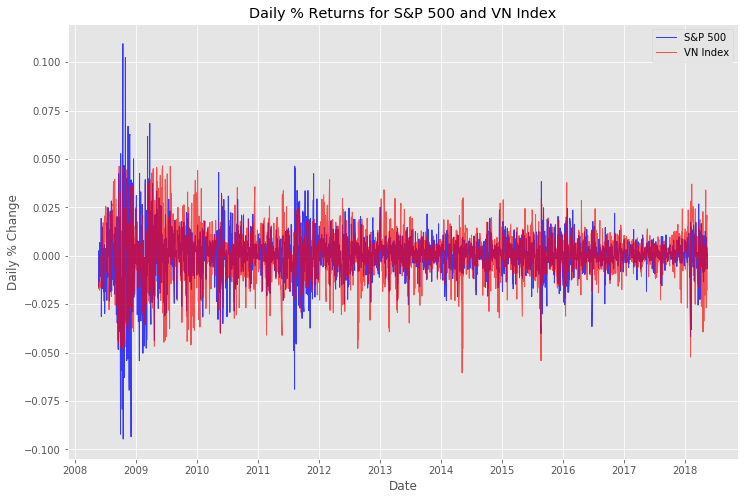

In [10]:
# plot daily returns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax.plot(SP500['log_diff'], label='S&P 500', color='b', linewidth=1.0, alpha=0.75)
ax.plot(VNIndex['log_diff'], label='VN Index', color='r', linewidth=1.0, alpha=0.65)
ax.set_xlabel('Date')
ax.set_ylabel('Daily % Change')
ax.set_title('Daily % Returns for S&P 500 and VN Index')
ax.legend()
plt.show()

# Distribution analysis

In [11]:
SP500_logdiff = SP500['log_diff'].dropna()
VNIndex_logdiff = VNIndex['log_diff'].dropna()

In [12]:
# function to plot histograms with adjusted time frames overlayed w/ 
# normal distribution

def histVnorm(data, start, end, bins, title):
    mean = np.mean(data)
    std = np.std(data)

    fig, ax = plt.subplots(nrows=len(start), 
                           ncols=1,
                           figsize=(12,15), 
                           sharex=True)
    ax_num = 0
    
    for start, end in zip(start, end):
        # calc mean and std for each period
        hist_data = data.loc[start:end]
        mean = np.mean(hist_data)
        std = np.std(hist_data)
        
        ax[ax_num].hist((data.loc[start:end]), 
                        bins, 
                        color='b', 
                        alpha=0.5, 
                        density=False,
                        label=str(title))
        ax[ax_num].set_xlabel('Daily % Change')
        ax[ax_num].set_ylabel('Number of occurrences')
        ax[ax_num].set_title(str(title) + ' vs Gaussian '+ '(' + str(start) + ' : ' + str(end) + ')')
        norm_dist = np.random.normal(mean, std, len(hist_data))
        ax[ax_num].hist(norm_dist, 
                        bins, 
                        color='g', 
                        density=False, 
                        alpha=0.5,
                        label='Gaussian')
        ax[ax_num].legend(loc='upper left')
        
        # print descriptive statistics on graph
        descrip_stat_A = ('*' + str(title) + '*' + '\n'
                          + '\n'
                          + 'min: ' + str(np.round(np.min(hist_data), 5)) + '\n'
                          + 'max: ' + str(np.round(np.max(hist_data), 5)) + '\n'
                          + 'mean: ' + str(np.round(np.mean(hist_data), 5)) + '\n'
                          + 'std: ' + str(np.round(np.std(hist_data), 5)) + '\n'
                          + 'skewness: ' + str(np.round(stats.skew(hist_data), 5)) + '\n'
                          + 'kurtosis: ' + str(np.round(stats.kurtosis(hist_data), 5)))
        descrip_stat_B = ('*' + 'Normal distribution' + '*' + '\n' 
                          + '\n'
                          + 'min: ' + str(np.round(np.min(norm_dist), 5)) + '\n'
                          + 'max: ' + str(np.round(np.max(norm_dist), 5)) + '\n'
                          + 'mean: ' + str(np.round(np.mean(norm_dist), 5)) + '\n'
                          + 'std: ' + str(np.round(np.std(norm_dist), 5)) + '\n'
                          + 'skewness: ' + str(np.round(stats.skew(norm_dist), 5)) + '\n'
                          + 'kurtosis: ' + str(np.round(stats.kurtosis(norm_dist), 5)))
        ax[ax_num].text(mean-(std*3), 20, s=descrip_stat_A, fontsize=10, ha='left')
        ax[ax_num].text(mean+(std*3), 20, s=descrip_stat_B, fontsize=10, ha='left')
        
        ax_num +=1
        

    return

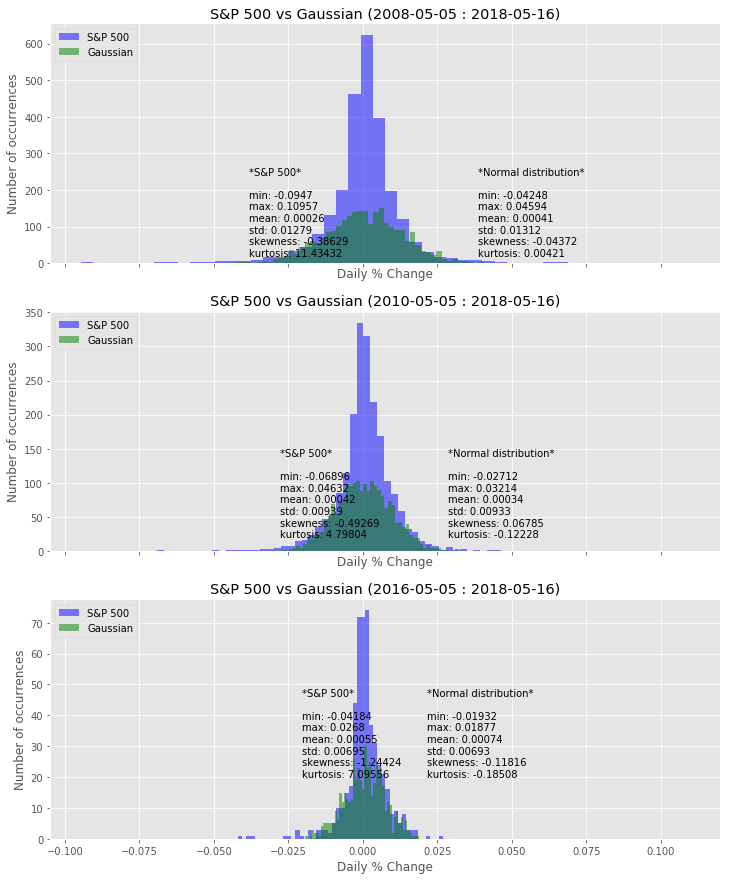

In [13]:
# define arguments
start = ['2008-05-05', '2010-05-05', '2016-05-05']
end =   ['2018-05-16', '2018-05-16', '2018-05-16']
num_periods = range(0, len(start))
bins=50

histVnorm(data=SP500_logdiff, start=start, end=end, bins=bins, title='S&P 500')

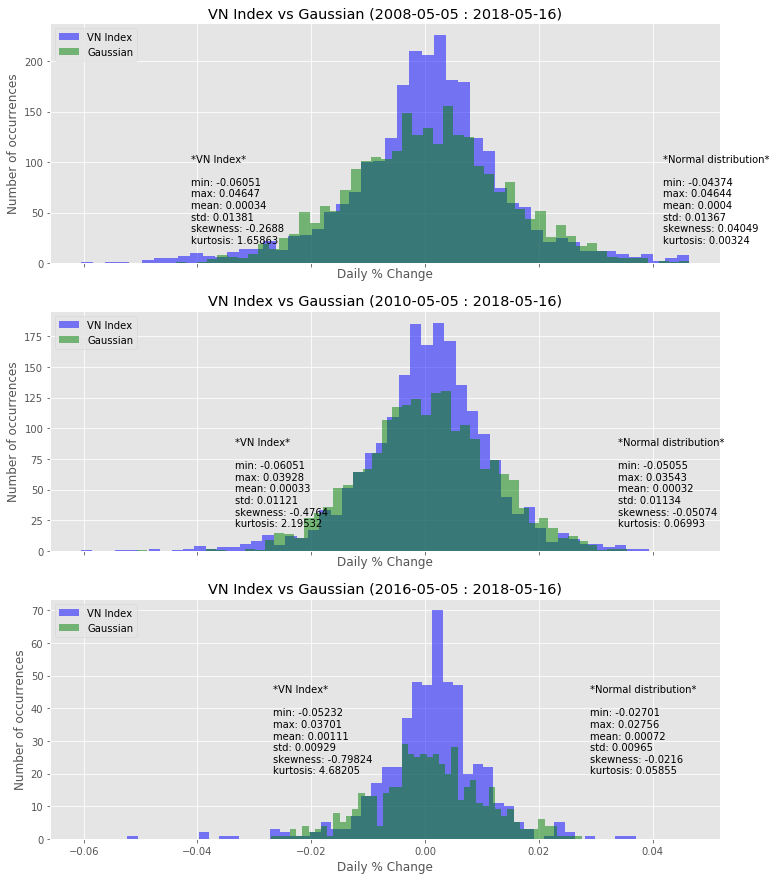

In [14]:
histVnorm(data=VNIndex_logdiff, start=start, end=end, bins=bins, title='VN Index')

# Monthly Returns Comparison

In [15]:
def monthly_returns(data, start, end, title):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    index_name = data.index.name
    
    # group by month
    monthly_data = data.reset_index()
    monthly_data['Month'] = monthly_data[index_name].dt.month
    monthly_data = monthly_data.drop(columns=[index_name])
    monthly_data = monthly_data.groupby(['Month']).sum().dropna()
    monthly_data['Months'] = months

    # plot
    fig, ax = plt.subplots(nrows=len(start), 
                           ncols=1,
                           figsize=(12,15), 
                           sharex=False)
    
    ax_num = 0
    for start, end in zip(start, end):
        ax[ax_num].bar(monthly_data['Months'], monthly_data.iloc[:,0])
        ax[ax_num].set_xlabel('Month')
        ax[ax_num].set_ylabel('Return')
        ax[ax_num].set_title(title + ' (' + str(start) + ' : ' + str(end) + ')')
        ax_num +=1
    
    fig.tight_layout()
    plt.show()
 
    return

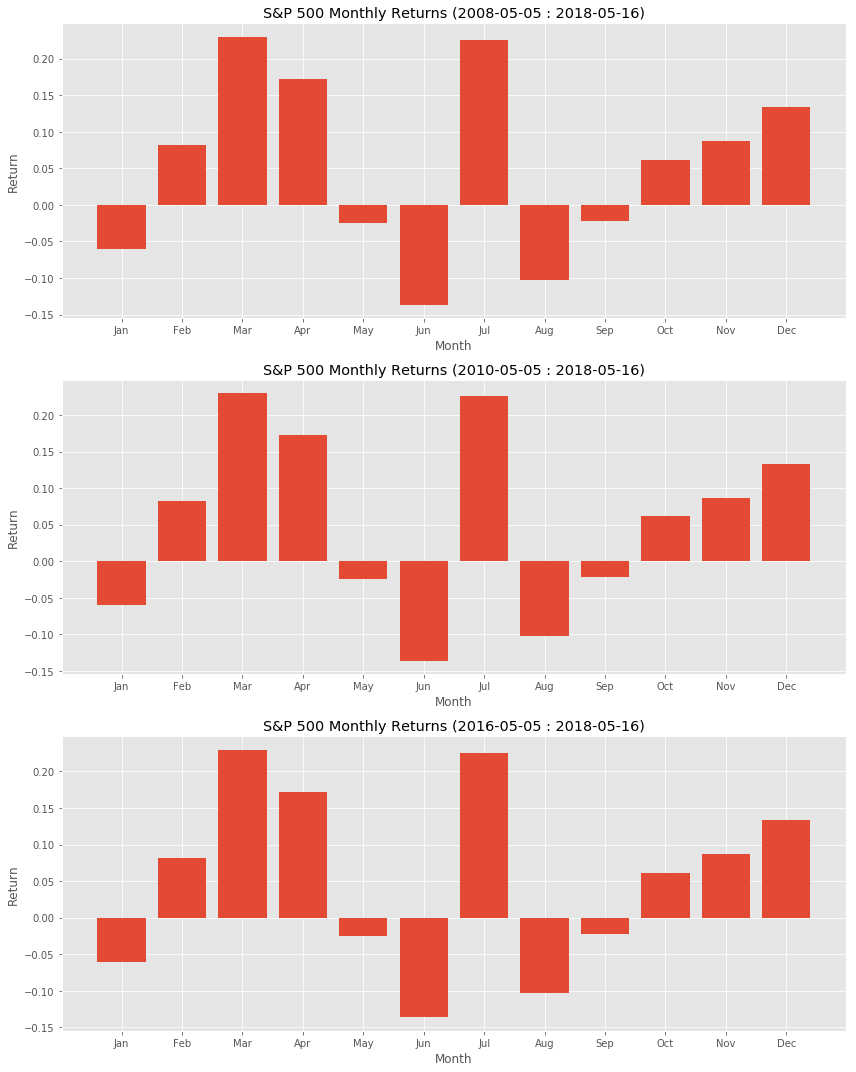

In [16]:
start = ['2008-05-05', '2010-05-05', '2016-05-05']
end =   ['2018-05-16', '2018-05-16', '2018-05-16']
SP500_logdiff = SP500['log_diff'].dropna()
monthly_returns(data=SP500_logdiff, start=start, end=end, title='S&P 500 Monthly Returns')

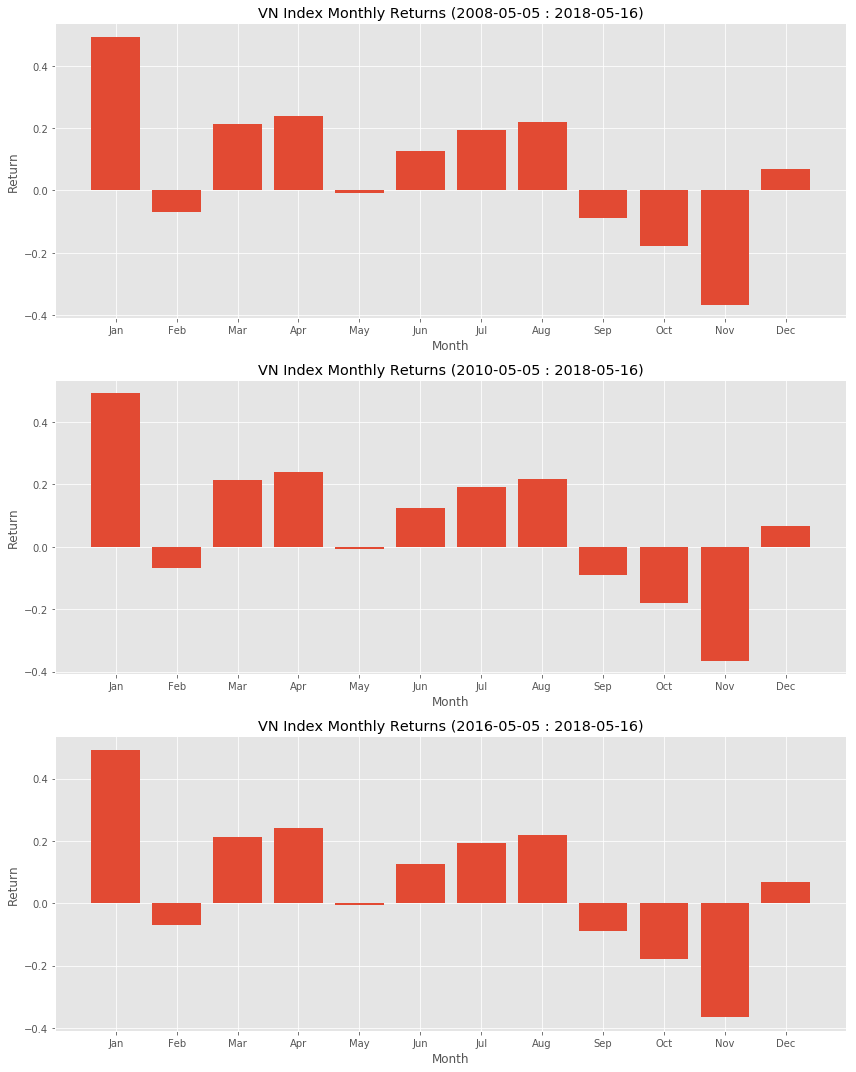

In [17]:
start = ['2008-05-05', '2010-05-05', '2016-05-05']
end =   ['2018-05-16', '2018-05-16', '2018-05-16']
VNIndex_logdiff = VNIndex['log_diff'].dropna()
monthly_returns(data=VNIndex_logdiff, start=start, end=end, title='VN Index Monthly Returns')

# Seasonal Trend Boxplots

In [18]:
# boxplots to analyze seasonal trends
SP500_piv = pd.DataFrame(SP500['Close'])
SP500_piv = SP500_piv.loc['2008-12-01':'2017']
SP500_piv['Month'] = SP500_piv.index.strftime('%b')
SP500_piv['Year'] = SP500_piv.index.year

SP500_piv = SP500_piv.groupby(pd.Grouper(freq='M')).last()
SP500_piv['Close'] = SP500_piv['Close'].apply(lambda x: np.log(x)).diff()
SP500_piv.dropna(inplace=True)
print(SP500_piv.head())

               Close Month  Year
Date                            
2009-01-31 -0.089550   Jan  2009
2009-02-28 -0.116457   Feb  2009
2009-03-31  0.081953   Mar  2009
2009-04-30  0.089772   Apr  2009
2009-05-31  0.051721   May  2009


In [19]:
# Pivot the columns to have the following, rows, columns, index, and values
SP500_piv = SP500_piv.pivot(index='Year', columns='Month', values='Close')

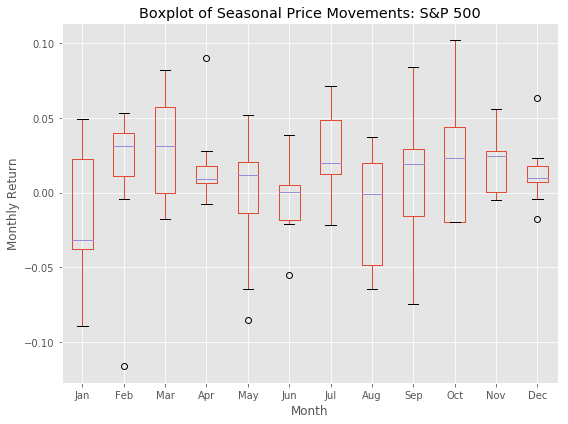

In [20]:
month_names = pd.date_range(start='2009', periods=12, freq='MS').strftime('%b')
SP500_piv = SP500_piv.reindex(columns=month_names)

fig, ax = plt.subplots(figsize=(8,6))
SP500_piv.plot(ax=ax, kind='box')

ax.set_xlabel('Month')
ax.set_ylabel('Monthly Return')
ax.set_title('Boxplot of Seasonal Price Movements: S&P 500')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()

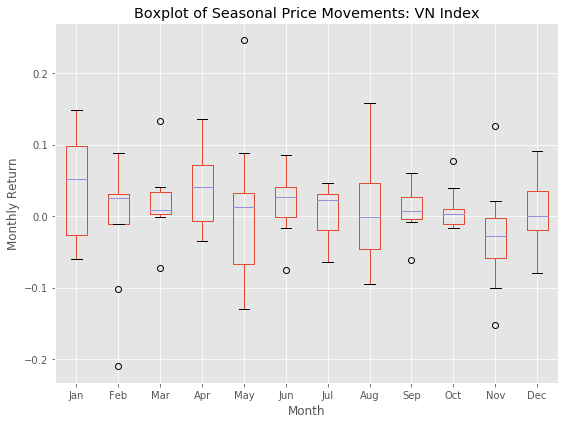

In [21]:
VNIndex_piv = pd.DataFrame(VNIndex['CLOSE'])
VNIndex_piv = VNIndex_piv.loc['2008-12-01':'2017']
VNIndex_piv['Month'] = VNIndex_piv.index.strftime('%b')
VNIndex_piv['Year'] = VNIndex_piv.index.year

VNIndex_piv = VNIndex_piv.groupby(pd.Grouper(freq='M')).last()
VNIndex_piv['CLOSE'] = VNIndex_piv['CLOSE'].apply(lambda x: np.log(x)).diff()
VNIndex_piv.dropna(inplace=True)

VNIndex_piv = VNIndex_piv.pivot(index='Year', columns='Month', values='CLOSE')

month_names = pd.date_range(start='2009', periods=12, freq='MS').strftime('%b')
VNIndex_piv = VNIndex_piv.reindex(columns=month_names)

fig, ax = plt.subplots(figsize=(8,6))
VNIndex_piv.plot(ax=ax, kind='box')

ax.set_xlabel('Month')
ax.set_ylabel('Monthly Return')
ax.set_title('Boxplot of Seasonal Price Movements: VN Index')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()

# Scatterplot and Regression

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


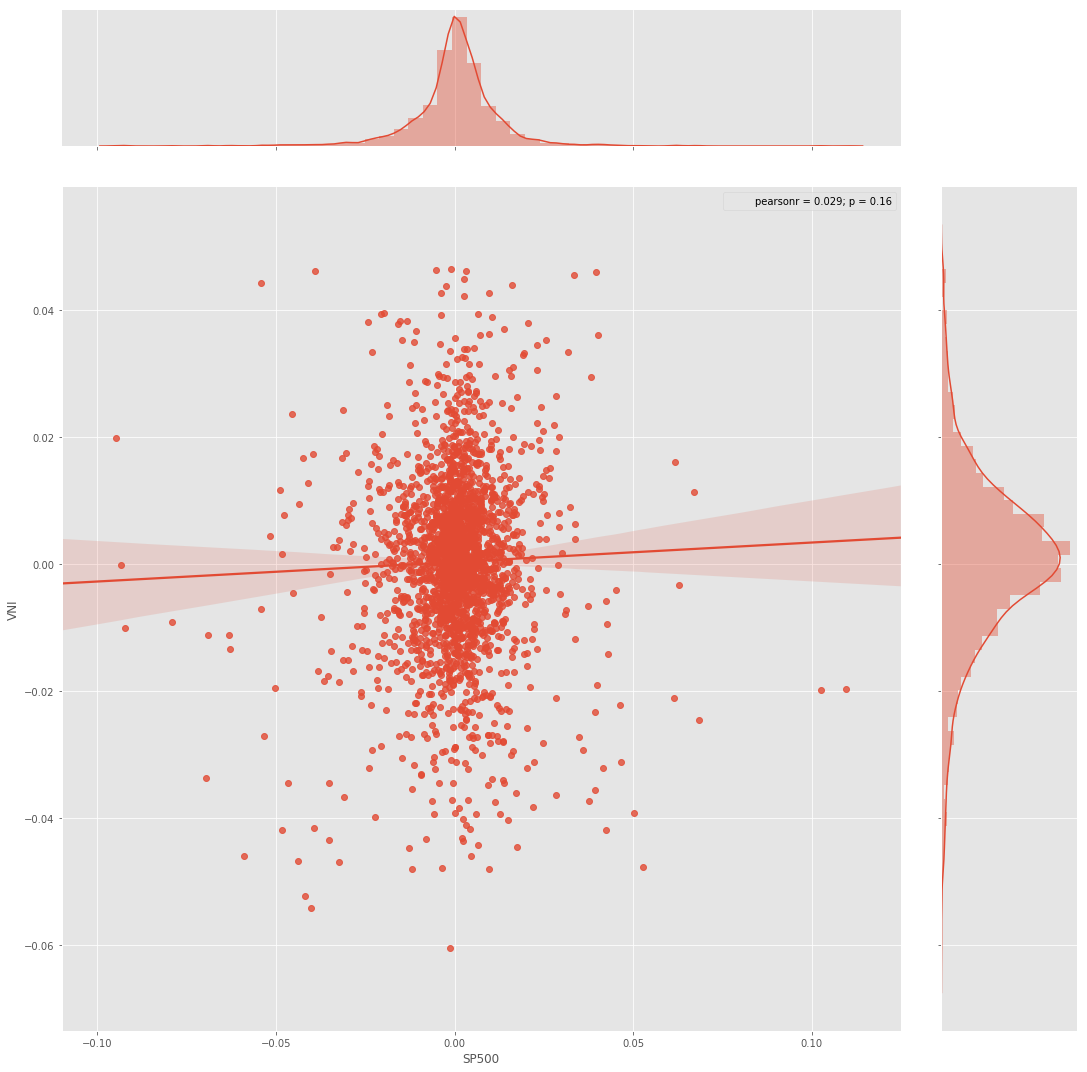

In [22]:
SP_VN = pd.DataFrame()
SP_VN['SP500'] = SP500['Close'].apply(lambda x: np.log(x)).diff().dropna()
SP_VN['VNI'] = VNIndex['CLOSE'].apply(lambda x: np.log(x)).diff().dropna()

sns.jointplot(x='SP500', 
              y='VNI', 
              data=SP_VN,
              kind='reg', 
              size=15, space = 0.3,
              marginal_kws=dict(bins=50))

# get the current matplotlib figure
fig = plt.gcf()
plt.show()